In [1]:
# changer le répertoire de travail du notebook vers le répertoire parent.
import os
current_dir = %pwd
project_dir = os.path.dirname(current_dir)
%cd $project_dir

/data/dhryniewski/DataScientest/doc-classifier


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from src import barplot, create_wordcloud

In [3]:
df2 = pd.read_csv("data/raw/data_02/text_process.csv")
df3 = pd.read_csv("data/raw/data_03/text_process.csv")
df4 = pd.read_csv("data/raw/data_04/text_process.csv")

df2['words'] = df2['words'].apply(lambda x: x.split(' ') if isinstance(x, str) else [])
df3['words'] = df3['words'].apply(lambda x: x.split(' ') if isinstance(x, str) else [])
df4['words'] = df4['words'].apply(lambda x: x.split(' ') if isinstance(x, str) else [])

df2['words_count'] = df2['words'].apply(lambda x: len(x))
df3['words_count'] = df3['words'].apply(lambda x: len(x))
df4['words_count'] = df4['words'].apply(lambda x: len(x))

df2['dataset'] = 'data_02'
df3['dataset'] = 'data_03'
df4['dataset'] = 'data_04'

df2['category'] = df2['category'].str.replace('facture', 'invoice')
df = pd.concat([df2, df3, df4])

# Distribution de nombre de mots par page et par catégorie

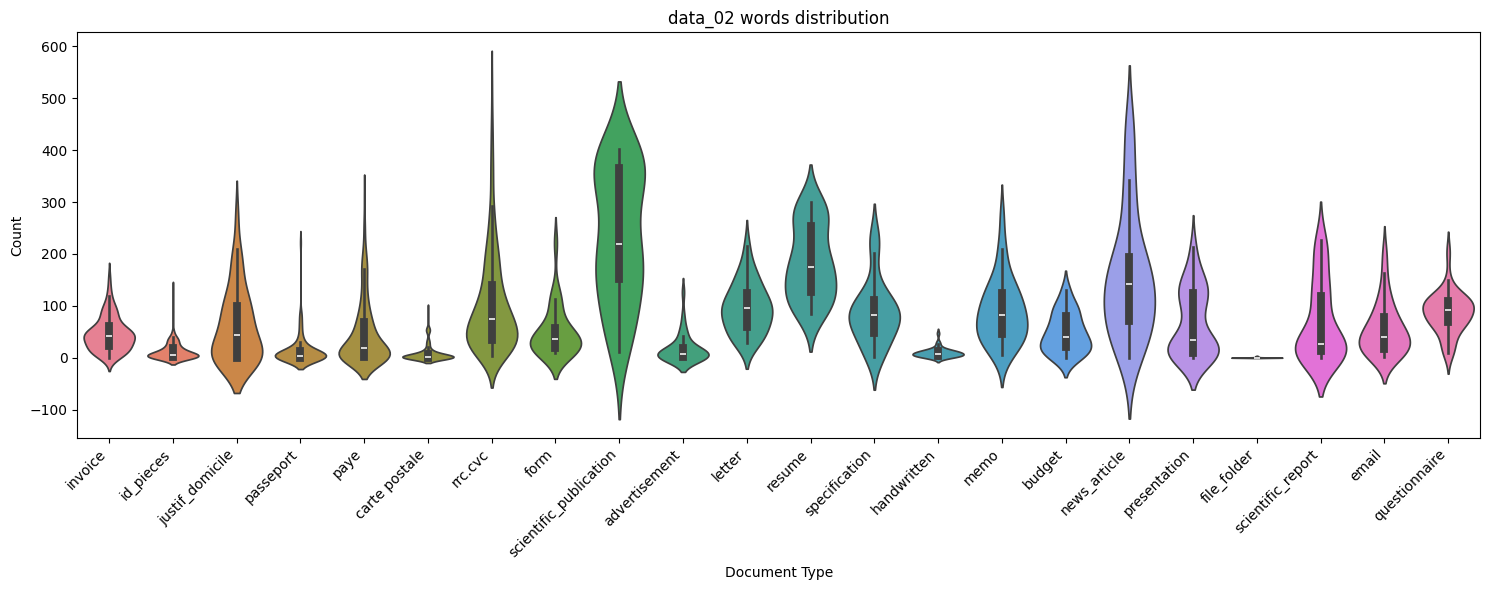

In [4]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=df2, x='category', y='words_count', hue='category')
plt.title('data_02 words distribution')
plt.xlabel('Document Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

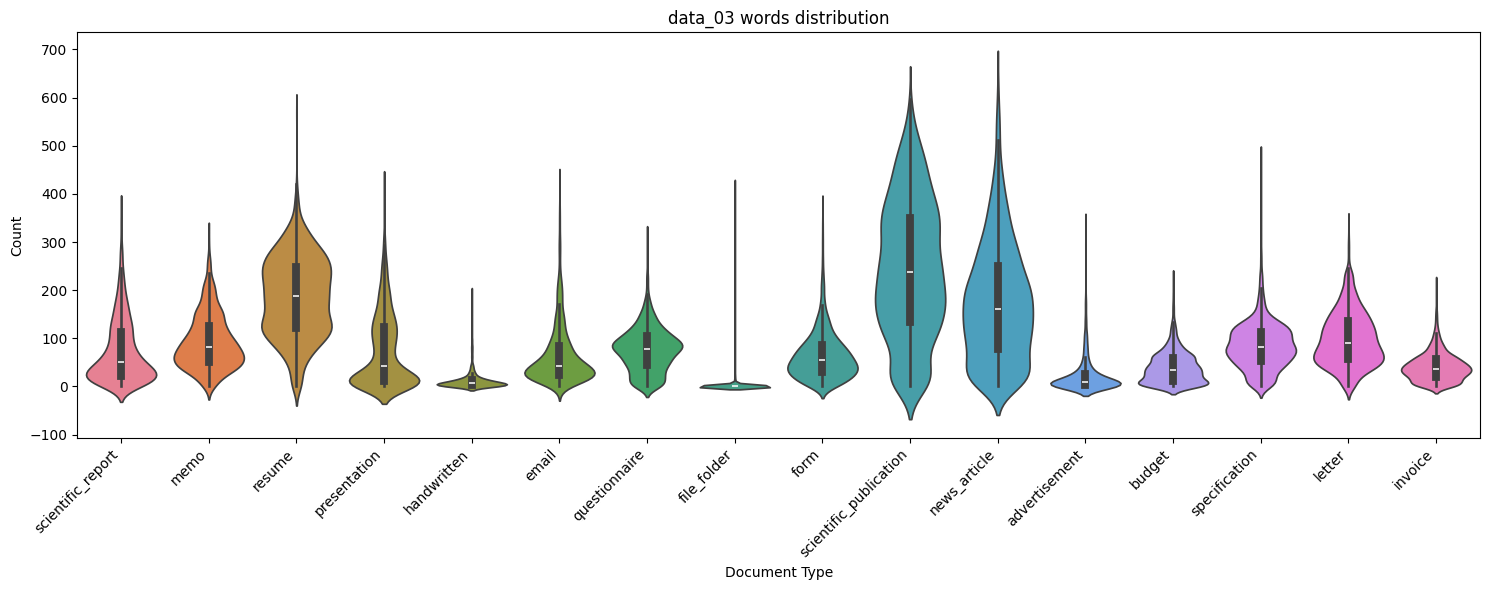

In [5]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=df3, x='category', y='words_count', hue='category')
plt.title('data_03 words distribution')
plt.xlabel('Document Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

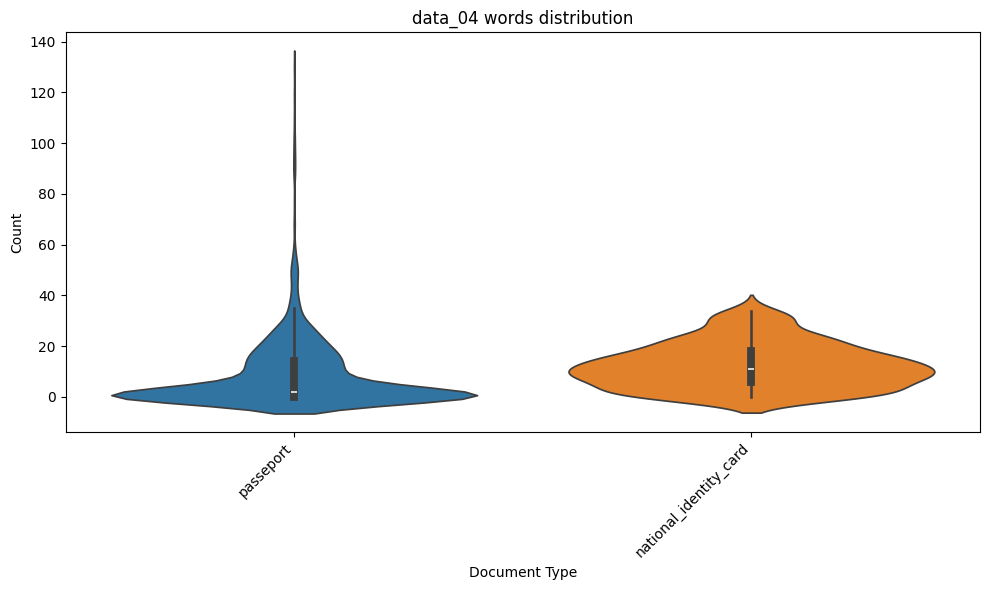

In [6]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df4, x='category', y='words_count', hue='category')
plt.title('data_04 words distribution')
plt.xlabel('Document Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Distribution de la langue, détécté par tesseract

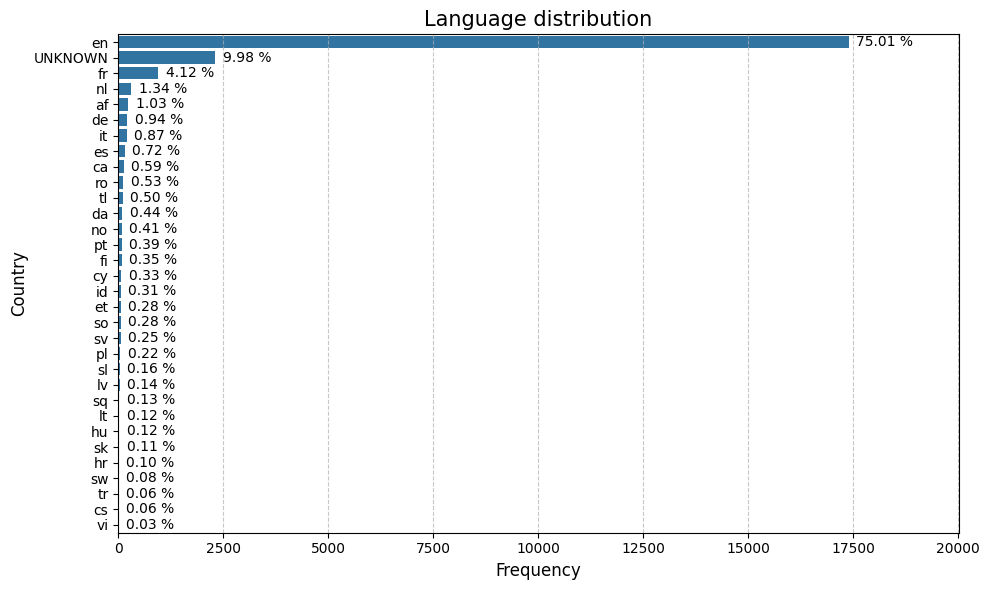

In [8]:
count = df['lang'].value_counts()
barplot(x = count.values,
        y = count.index,
        figsize = (10, 6),
        xlabel = 'Frequency',
        ylabel = 'Country',
        title = f'Language distribution')

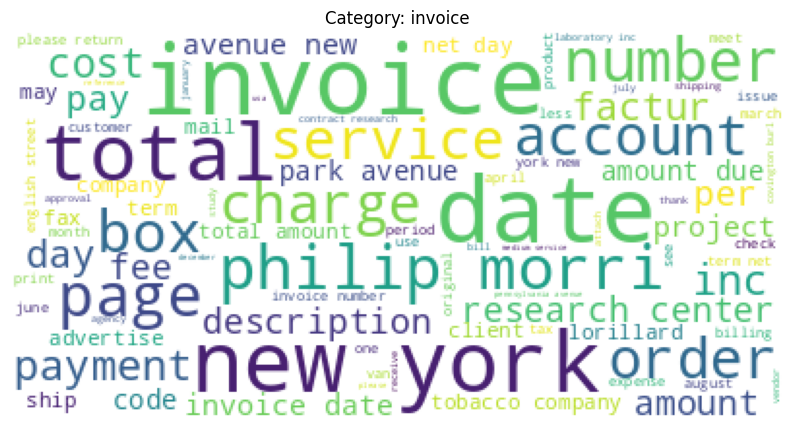

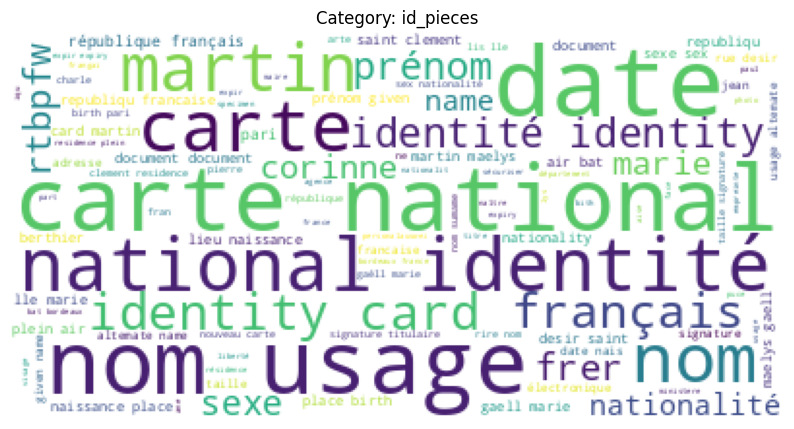

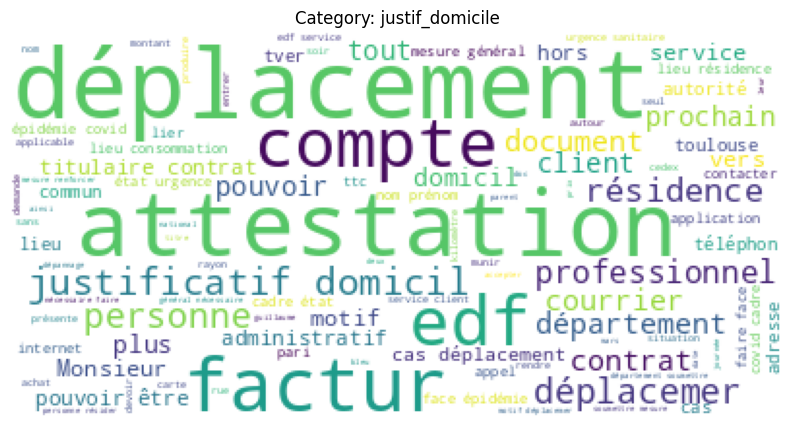

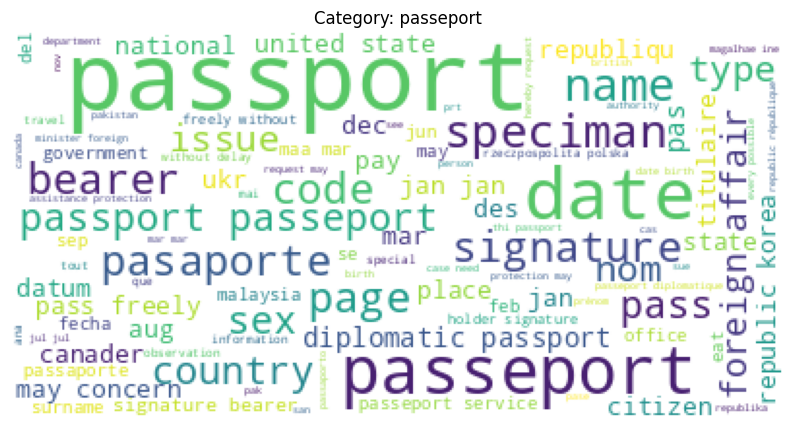

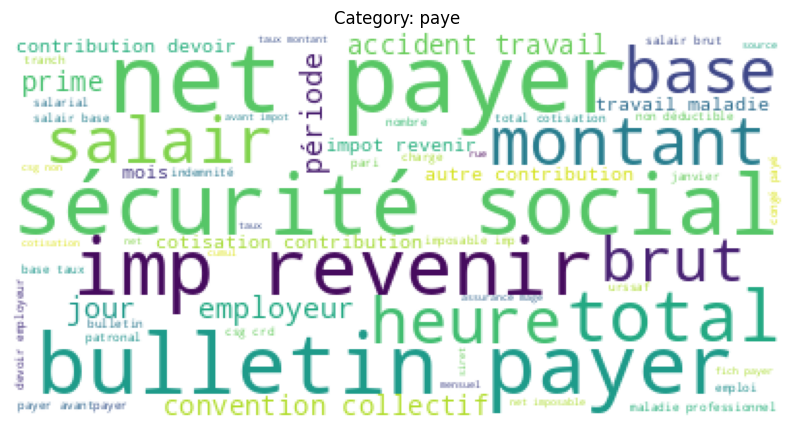

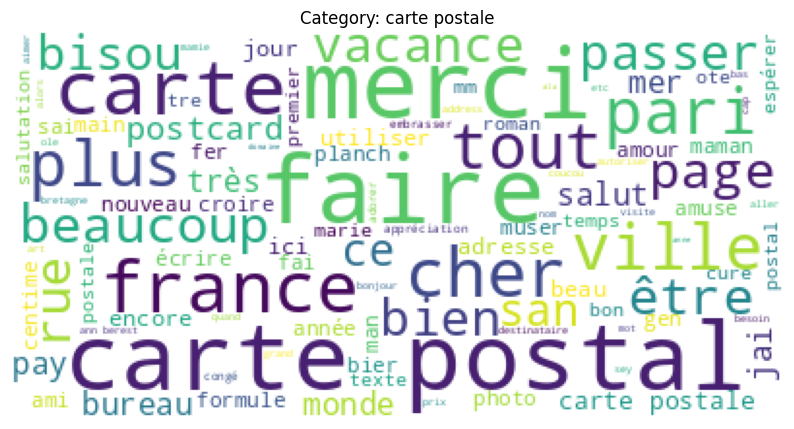

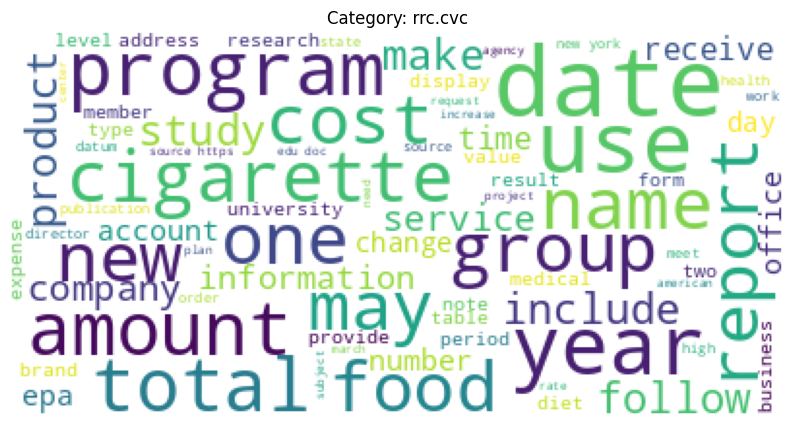

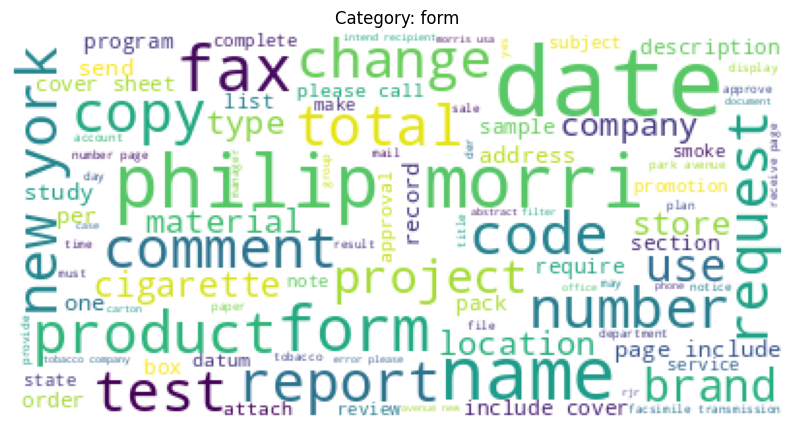

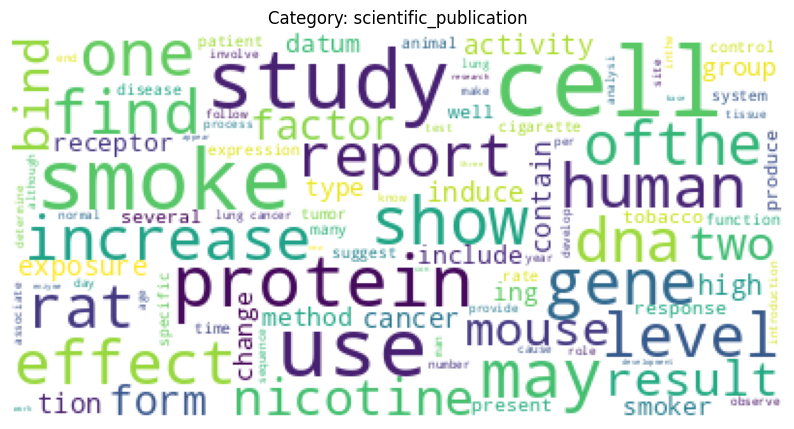

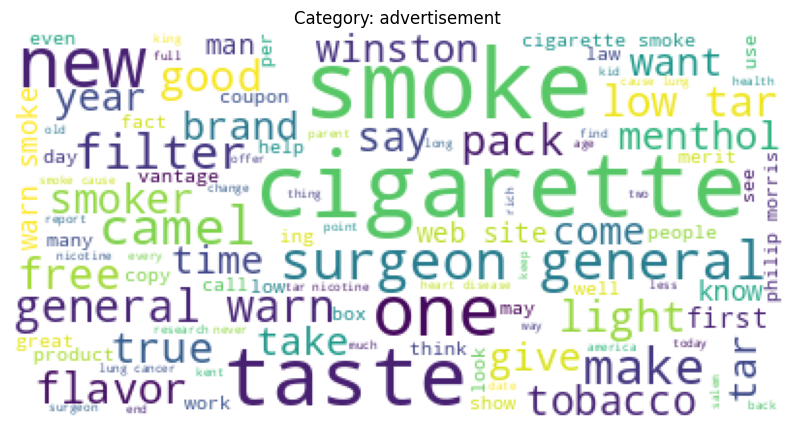

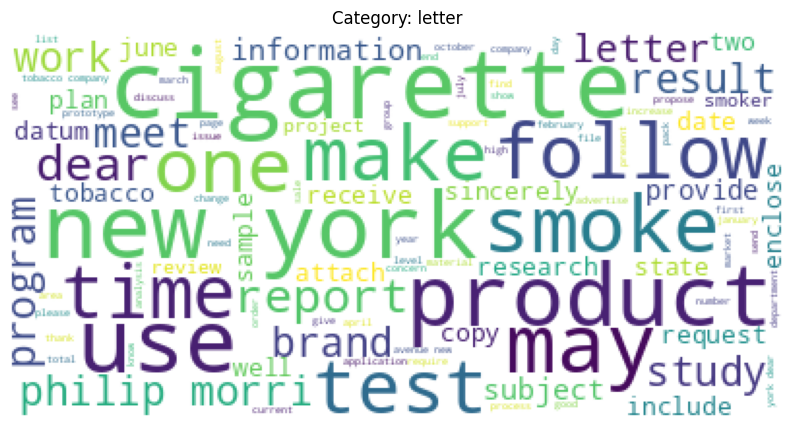

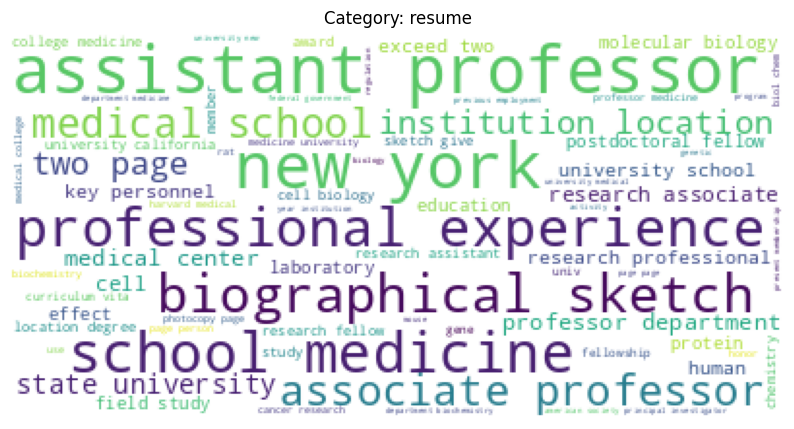

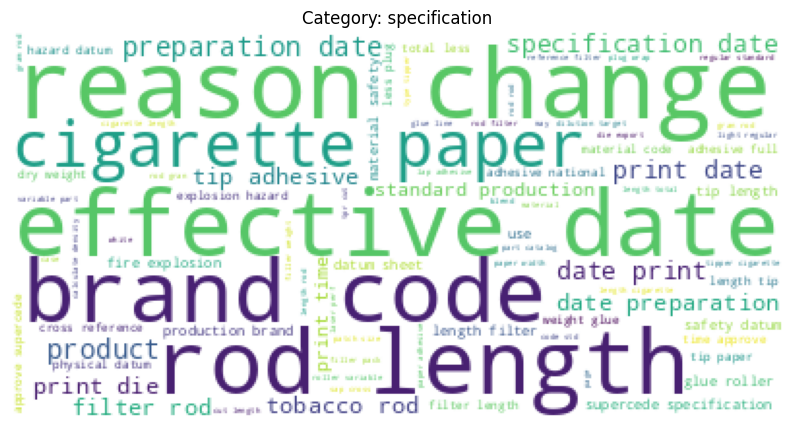

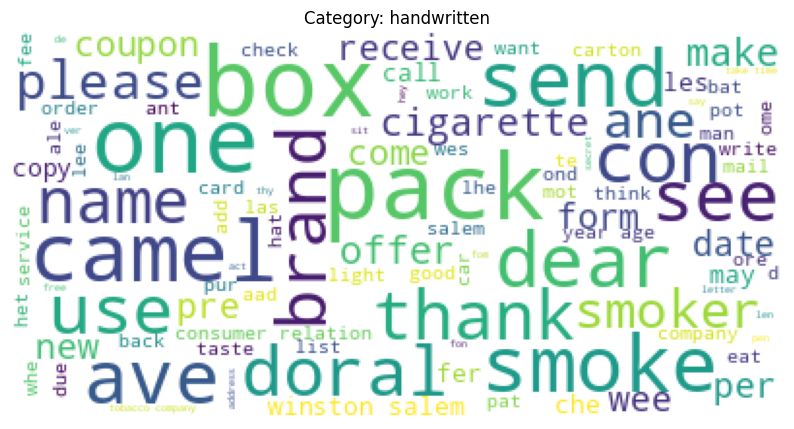

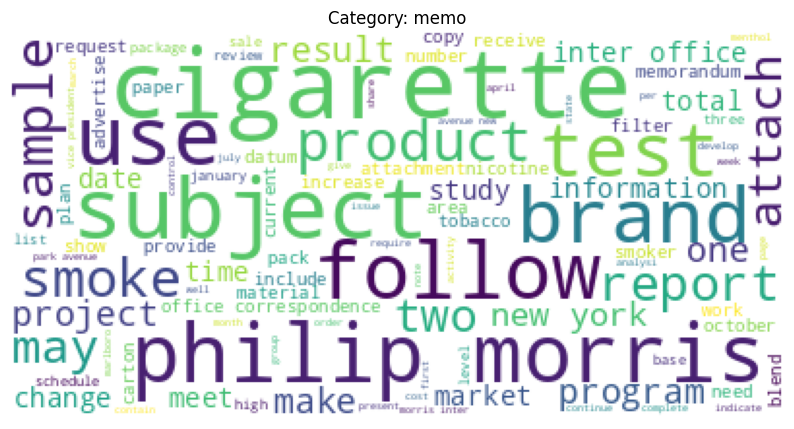

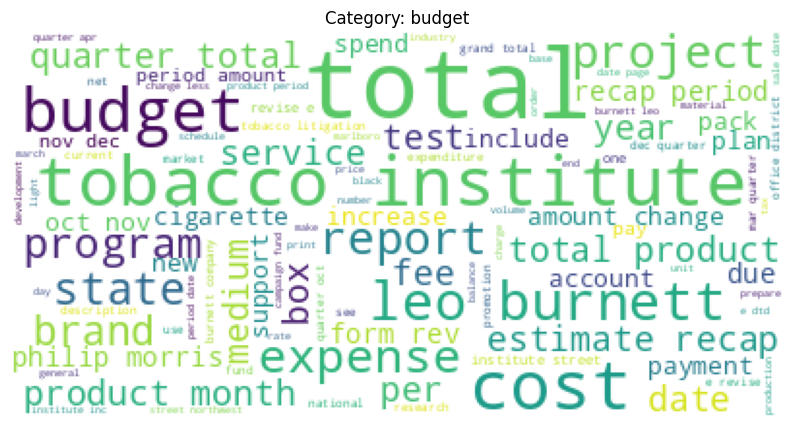

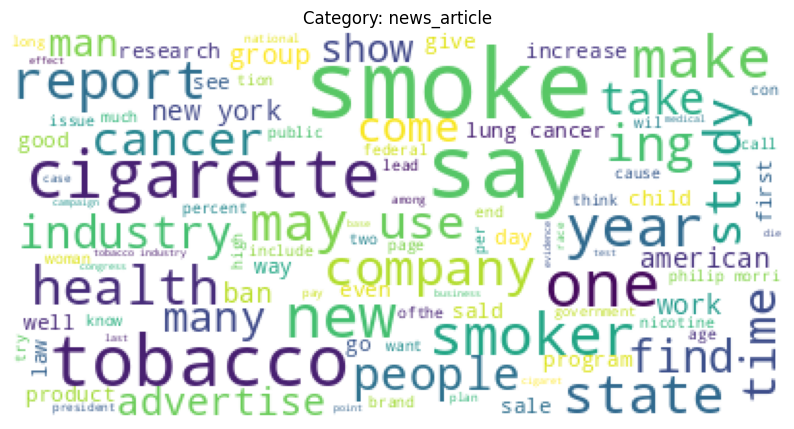

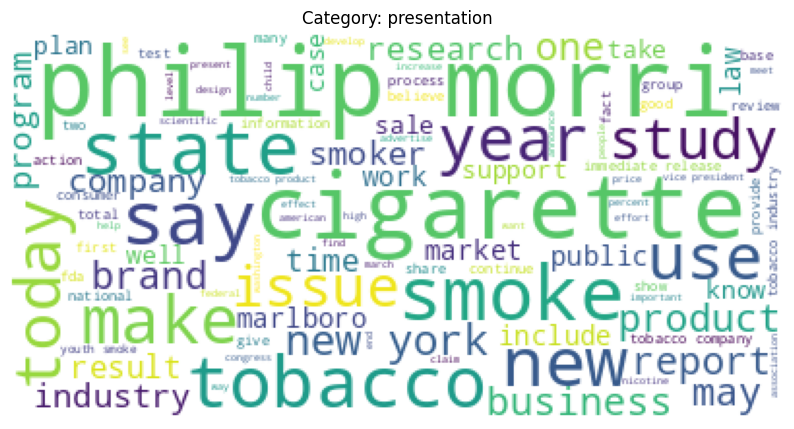

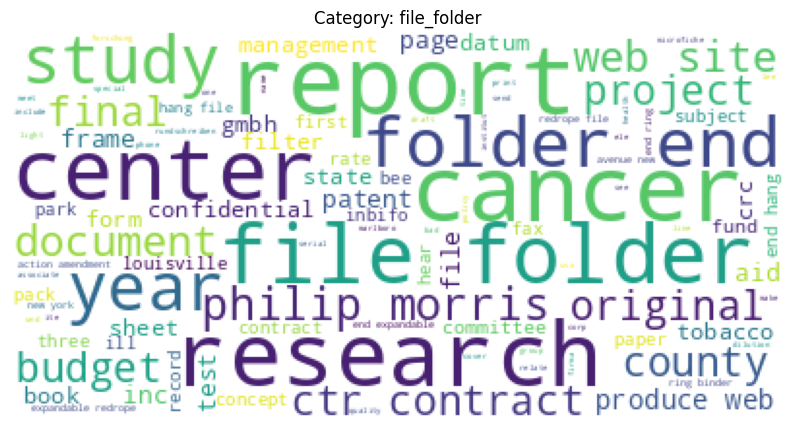

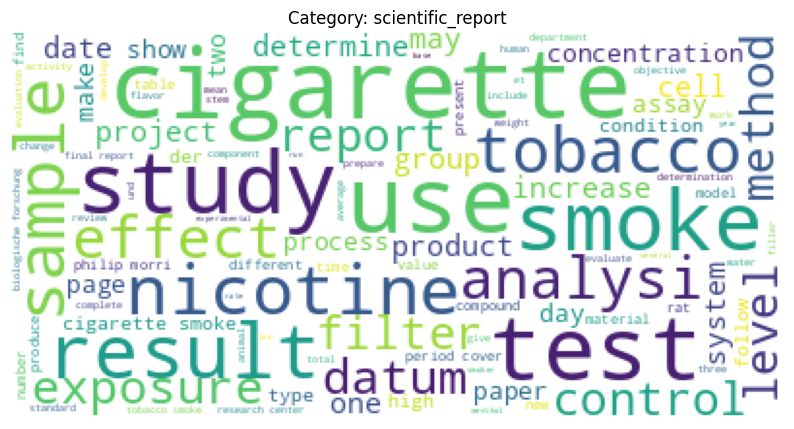

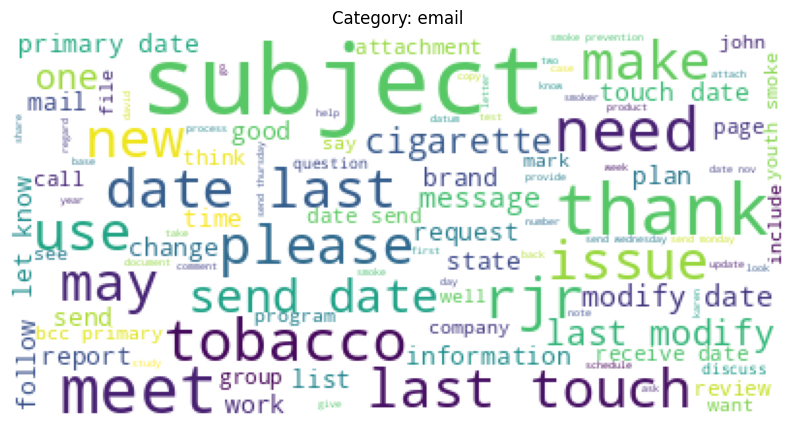

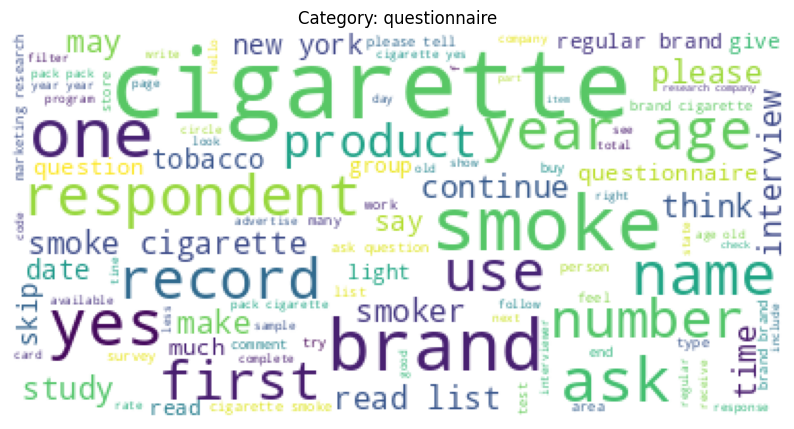

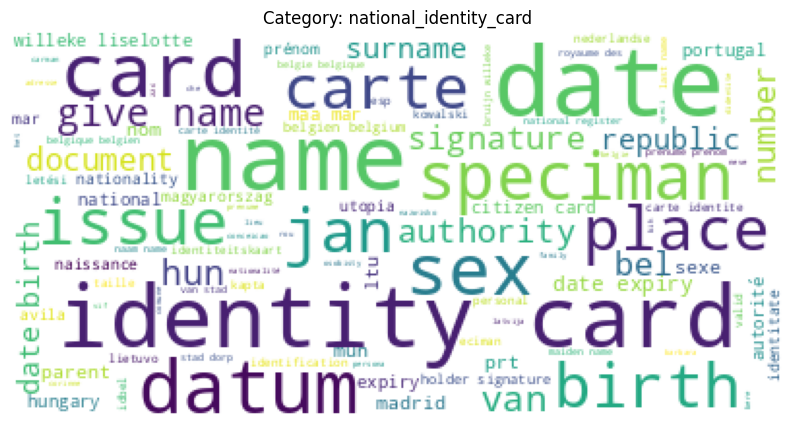

In [11]:
for category in df['category'].unique():
    df_cat = df[df['category'] == category]
    cat_words = df_cat['words'].sum()
    create_wordcloud(cat_words, title=f"Category: {category}")

### Le pourcentage de la fréquence des mots les plus présent dans chaque catégorie

In [25]:
categories = []
values = []
for category in df['category'].unique():
    df_cat = df[df['category'] == category]

    word_freq = Counter(df_cat['words'].sum())
    top_words = word_freq.most_common()
    top_words, frequencies = zip(*top_words)

    f_percent = [value/sum(frequencies)*100 for value in frequencies]
    values.append([sum(f_percent[:5]), sum(f_percent[:10]), sum(f_percent[:25]), sum(f_percent[:50])])
    categories.append(category)

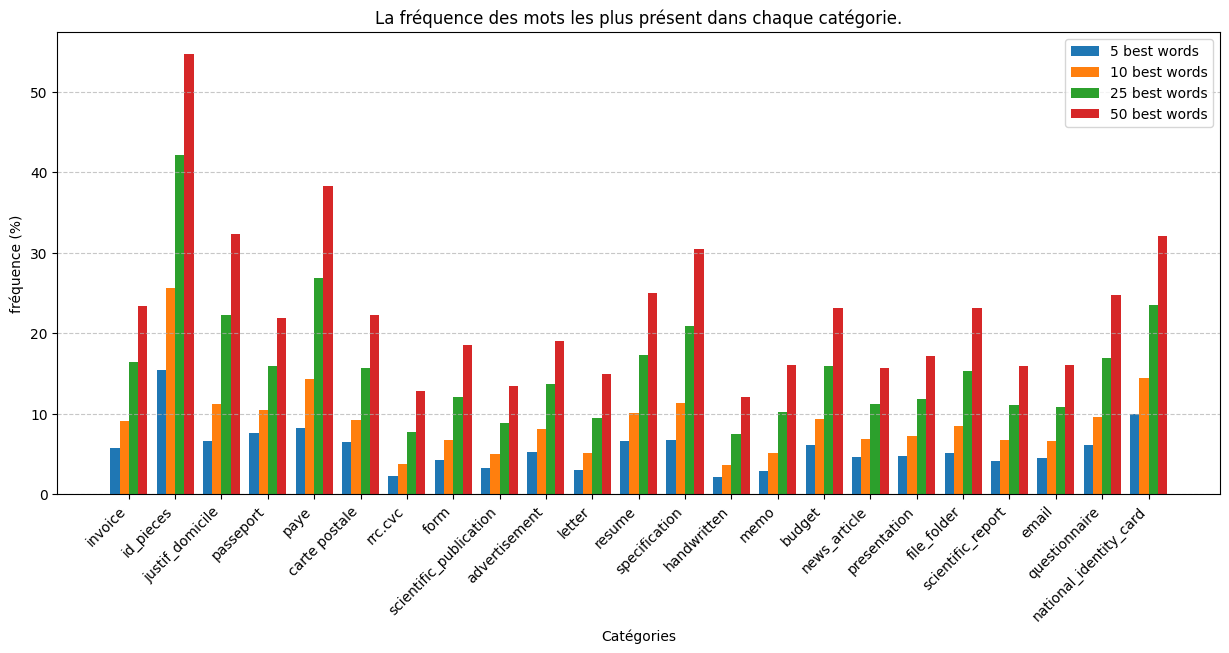

In [31]:
import numpy as np


vals = np.array(values)
bar_size = 0.2
x = np.arange(len(categories))
# Créer le graphique
plt.figure(figsize=(15, 6))
for i in range(len(vals[0])):
    plt.bar(x + i * bar_size, vals[:, i], width=bar_size, label=f'Valeur {i+1}')


plt.title('La fréquence des mots les plus présent dans chaque catégorie.')
plt.xlabel('Catégories')
plt.ylabel('fréquence (%)')
plt.xticks(x + bar_size * (len(vals[0]) - 1) / 2, categories)
plt.legend(labels=['5 best words', '10 best words', '25 best words', '50 best words'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Afficher le graphique
plt.show()